In [1]:
import ehc_sn as ehc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
! python -m scripts.run-mace --map="example" --output_file="ex_trajectories"

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
[02/22/25 16:58:02] INFO     INFO:__main__:Preparing map          ]8;id=111976;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py\run-mace.py]8;;\:]8;id=870626;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py#64\64]8;;\
                             environment: example                               
                    INFO     INFO:__main__:Starting manual        ]8;id=75608;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py\run-mace.py]8;;\:]8;id=322027;file:///home/borja/projects/spatial-navigation/scripts/run-mace.py#69\69]8;;\
                             control                                            
pressed right
step=1, reward=0.00
pressed up
step=2, reward=0.00
pressed up
step=3, reward=0.00
pressed up
step=4, reward=0.00
pressed up
step=5, reward=0.00
pressed up
step=6, reward=0.00
pressed up
st

In [2]:
trajectories = np.load("data/ex_trajectories.npy", allow_pickle=True)
trajectories.shape

(4,)

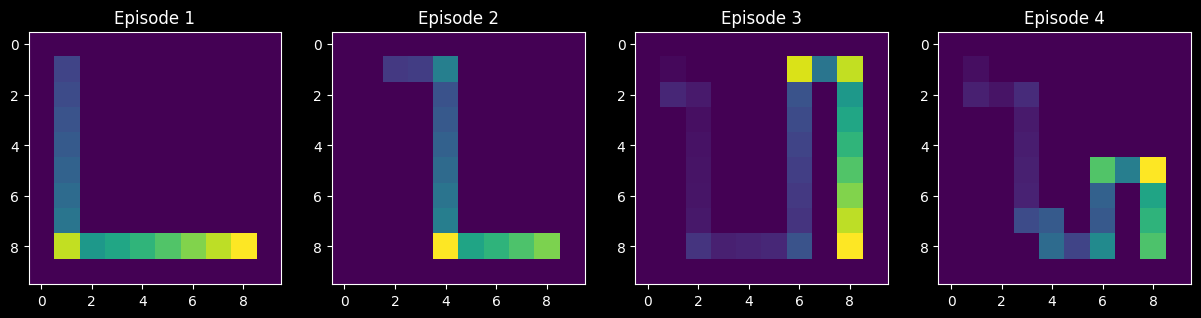

In [3]:
plt.figure(figsize=(15, 5))
for n, X in enumerate(trajectories):
    plt.subplot(1, len(trajectories), n + 1)
    y = ehc.sequence(X, δ=0.9)
    plt.imshow(y.T, cmap="viridis")
    plt.title(f"Episode {n+1}")
plt.show()

In [4]:
settings = ehc.HGMSettings(δ=0.8, τ=0.1, c=0.4)
model = ehc.HierarchicalGenerativeModel([1.0], 100, settings)

In [5]:
episodes = [e.reshape(e.shape[0], -1) for e in trajectories]
ehc.learning(model, episodes)

In [ ]:
Θ = model.sample_maps()
map1_values = Θ[0].reshape(10, 10).T

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(map1_values, cmap="viridis")

AttributeError: 'numpy.ndarray' object has no attribute 'values'